In [1]:
import numpy as np
import pandas as pd
import keras
import cv2
import joblib
import tensorflow as tf
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score,RandomizedSearchCV,GridSearchCV

# Data Augmentation

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datagen = ImageDataGenerator(
            rotation_range=15,
            width_shift_range=0.12,
            height_shift_range=0.1,
            shear_range=0.26,
            zoom_range=0.13,
            horizontal_flip=True,
            fill_mode='nearest')

In [ ]:
def re_scale(x):
  scale = 10
  w = int(x.shape[1] * scale / 100)
  h = int(x.shape[0] * scale / 100)
  d = (w,h)
  out = cv2.resize(x,d)
  return out

### 1. Data Augmentation for jump

In [ ]:
#doing augmentation for the jump data
def data_aug(x):
  i=0
  for batch in datagen.flow(x,batch_size=1,save_to_dir='/content/drive/MyDrive/dino/aug_jump',save_prefix='jump',save_format='JPG'):
      i +=1
      if i > 20:
          break

In [ ]:
img1 = load_img('/content/drive/MyDrive/dino/jump/IMG_20210609_131039.jpg')
x = img_to_array(img1)
out = re_scale(x)
x = out.reshape((1,) + out.shape)
data_aug(x)

In [ ]:
img2 = load_img('/content/drive/MyDrive/dino/jump/IMG_20210609_131208.jpg')
x = img_to_array(img2)
out = re_scale(x)
x = out.reshape((1,) + out.shape)
data_aug(x)

In [ ]:
img3 = load_img('/content/drive/MyDrive/dino/jump/IMG_20210609_131235.jpg')
x = img_to_array(img3)
out = re_scale(x)
x = out.reshape((1,) + out.shape)
data_aug(x)

In [ ]:
img4 = load_img('/content/drive/MyDrive/dino/jump/IMG_20210609_131244.jpg')
x = img_to_array(img4)
out = re_scale(x)
x = out.reshape((1,) + out.shape)
data_aug(x)

In [ ]:
img5 = load_img('/content/drive/MyDrive/dino/jump/IMG_20210609_131251.jpg')
x = img_to_array(img5)
out = re_scale(x)
x = out.reshape((1,) + out.shape)
data_aug(x)

In [ ]:
img6 = load_img('/content/drive/MyDrive/dino/jump/IMG_20210609_131331.jpg')
x = img_to_array(img6)
out = re_scale(x)
x = out.reshape((1,) + out.shape)
data_aug(x)

In [ ]:
img7 = load_img('/content/drive/MyDrive/dino/jump/IMG_20210609_131338.jpg')
x = img_to_array(img7)
out = re_scale(x)
x = out.reshape((1,) + out.shape)
data_aug(x)

In [ ]:
img8 = load_img('/content/drive/MyDrive/dino/jump/IMG_20210609_131344.jpg')
x = img_to_array(img8)
out = re_scale(x)
x = out.reshape((1,) + out.shape)
data_aug(x)

In [ ]:
img9 = load_img('/content/drive/MyDrive/dino/jump/IMG_20210609_131350.jpg')
x = img_to_array(img9)
out = re_scale(x)
x = out.reshape((1,) + out.shape)
data_aug(x)

In [ ]:
img10 = load_img('/content/drive/MyDrive/dino/jump/IMG_20210609_131357.jpg')
x = img_to_array(img10)
out = re_scale(x)
x = out.reshape((1,) + out.shape)
data_aug(x)

In [ ]:
img11 = load_img('/content/drive/MyDrive/dino/jump/IMG_20210609_131403.jpg')
x = img_to_array(img11)
out = re_scale(x)
x = out.reshape((1,) + out.shape)
data_aug(x)

In [ ]:
img12 = load_img('/content/drive/MyDrive/dino/jump/IMG_20210609_131432.jpg')
x = img_to_array(img12)
out = re_scale(x)
x = out.reshape((1,) + out.shape)
data_aug(x)

In [ ]:
img13 = load_img('/content/drive/MyDrive/dino/jump/IMG_20210609_131519.jpg')
x = img_to_array(img13)
out = re_scale(x)
x = out.reshape((1,) + out.shape)
data_aug(x)

### 2. Data Augmentation for no jump

In [ ]:
#doing augmentation for the no jump data
def data_aug_nojump(x):
  i=0
  for batch in datagen.flow(x,batch_size=1,save_to_dir='/content/drive/MyDrive/dino/aug_nojump',save_prefix='jump',save_format='JPG'):
      i +=1
      if i > 20:
          break

In [ ]:
img1 = load_img('/content/drive/MyDrive/dino/no_jump/IMG_20210609_131159.jpg')
x = img_to_array(img1)
out = re_scale(x)
x = out.reshape((1,) + out.shape)
data_aug_nojump(x)

In [ ]:
img2 = load_img('/content/drive/MyDrive/dino/no_jump/IMG_20210609_131215.jpg')
x = img_to_array(img2)
out = re_scale(x)
x = out.reshape((1,) + out.shape)
data_aug_nojump(x)

In [ ]:
img3 = load_img('/content/drive/MyDrive/dino/no_jump/IMG_20210609_131222.jpg')
x = img_to_array(img3)
out = re_scale(x)
x = out.reshape((1,) + out.shape)
data_aug_nojump(x)

In [ ]:
img4 = load_img('/content/drive/MyDrive/dino/no_jump/IMG_20210609_131228.jpg')
x = img_to_array(img4)
out = re_scale(x)
x = out.reshape((1,) + out.shape)
data_aug_nojump(x)

In [ ]:
img5 = load_img('/content/drive/MyDrive/dino/no_jump/IMG_20210609_131312.jpg')
x = img_to_array(img5)
out = re_scale(x)
x = out.reshape((1,) + out.shape)
data_aug_nojump(x)

In [ ]:
img6 = load_img('/content/drive/MyDrive/dino/no_jump/IMG_20210609_131318.jpg')
x = img_to_array(img6)
out = re_scale(x)
x = out.reshape((1,) + out.shape)
data_aug_nojump(x)

In [ ]:
img7 = load_img('/content/drive/MyDrive/dino/no_jump/IMG_20210609_131325.jpg')
x = img_to_array(img7)
out = re_scale(x)
x = out.reshape((1,) + out.shape)
data_aug_nojump(x)

In [ ]:
img8 = load_img('/content/drive/MyDrive/dino/no_jump/IMG_20210609_131410.jpg')
x = img_to_array(img8)
out = re_scale(x)
x = out.reshape((1,) + out.shape)
data_aug_nojump(x)

In [ ]:
img9 = load_img('/content/drive/MyDrive/dino/no_jump/IMG_20210609_131416.jpg')
x = img_to_array(img9)
out = re_scale(x)
x = out.reshape((1,) + out.shape)
data_aug_nojump(x)

In [ ]:
img10 = load_img('/content/drive/MyDrive/dino/no_jump/IMG_20210609_131424.jpg')
x = img_to_array(img10)
out = re_scale(x)
x = out.reshape((1,) + out.shape)
data_aug_nojump(x)

In [ ]:
img11 = load_img('/content/drive/MyDrive/dino/no_jump/IMG_20210609_131438.jpg')
x = img_to_array(img11)
out = re_scale(x)
x = out.reshape((1,) + out.shape)
data_aug_nojump(x)

In [ ]:
img12 = load_img('/content/drive/MyDrive/dino/no_jump/IMG_20210609_131444.jpg')
x = img_to_array(img12)
out = re_scale(x)
x = out.reshape((1,) + out.shape)
data_aug_nojump(x)

In [ ]:
img13 = load_img('/content/drive/MyDrive/dino/no_jump/IMG_20210609_131450.jpg')
x = img_to_array(img13)
out = re_scale(x)
x = out.reshape((1,) + out.shape)
data_aug_nojump(x)

In [ ]:
img14 = load_img('/content/drive/MyDrive/dino/no_jump/IMG_20210609_131501.jpg')
x = img_to_array(img14)
out = re_scale(x)
x = out.reshape((1,) + out.shape)
data_aug_nojump(x)

In [ ]:
img15 = load_img('/content/drive/MyDrive/dino/no_jump/IMG_20210609_131507.jpg')
x = img_to_array(img15)
out = re_scale(x)
x = out.reshape((1,) + out.shape)
data_aug_nojump(x)

In [ ]:
img16 = load_img('/content/drive/MyDrive/dino/no_jump/IMG_20210609_131513.jpg')
x = img_to_array(img16)
out = re_scale(x)
x = out.reshape((1,) + out.shape)
data_aug_nojump(x)

## Testing Data

In [ ]:
img = cv2.imread('/content/drive/MyDrive/dino/aug_jump/jump_0_1044.JPG')

In [ ]:
img.shape

(563, 422, 3)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgCanny = cv2.Canny(gray, 155, 105)

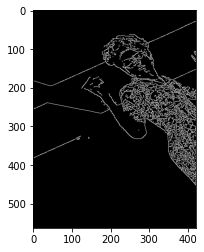

In [ ]:
img=cv2.cvtColor(imgCanny, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## Importing Data

In [3]:
import os

directory = '/content/drive/MyDrive/dino'
jump_img = os.listdir(os.path.join(directory, 'aug_jump'))
nojump_img = os.listdir(os.path.join(directory, 'aug_nojump'))

print(len(jump_img) == len(nojump_img))
print(len(jump_img))
print(len(nojump_img))

False
407
503


## Image to Array

In [4]:
jump = []
nojump = []

for img in jump_img:
    images = cv2.imread(os.path.join(directory, 'aug_jump', img))
    gray = cv2.cvtColor(images, cv2.COLOR_BGR2GRAY)
    imgCanny = cv2.Canny(gray, 155, 105)

    jump.append(imgCanny)
    
for img in nojump_img:
    images = cv2.imread(os.path.join(directory, 'aug_nojump', img))
    gray = cv2.cvtColor(images, cv2.COLOR_BGR2GRAY)
    imgCanny = cv2.Canny(gray, 155, 105)
    
    nojump.append(imgCanny)

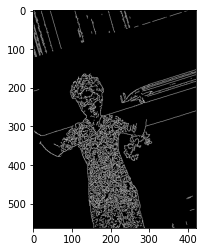

In [5]:
img = cv2.cvtColor(jump[0], cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [ ]:
#Taking a look at the first img of array_imgs_jump list
print(jump[0])
print(50*'=')
print('Images Dimensions:', jump[0].shape)

[[  0   0 255 ...   0   0   0]
 [  0   0 255 ...   0   0   0]
 [  0 255   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
Images Dimensions: (563, 422)


In [ ]:
print('Original size : ',jump[0].size)

Original size :  237586


## Rescaling

(112, 84)
(112, 84)


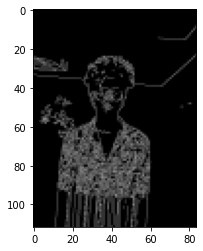

In [6]:
scale_percent = 20 # 20 percent of original size
resized_jump_list = []
resized_nojump_list = []

for img in jump:
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)

    dim = (width, height)

    #resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    resized_jump_list.append(resized)

for img in nojump:
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    
    dim = (width, height)
    
    #resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    resized_nojump_list.append(resized)

#Checking if it worked:
print(resized_jump_list[0].shape)
print(resized_nojump_list[0].shape)

img = cv2.cvtColor(resized_nojump_list[10], cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## Creating x dataset

In [7]:
nojump_list_reshaped = []
jump_list_reshaped = []

for img in resized_nojump_list:
    nojump_list_reshaped.append(img.reshape(-1, img.size))

for img in resized_jump_list:
    jump_list_reshaped.append(img.reshape(-1, img.size))

X_nojump = np.array(nojump_list_reshaped).reshape(len(nojump_list_reshaped), nojump_list_reshaped[0].size)
X_jump = np.array(jump_list_reshaped).reshape(len(jump_list_reshaped), jump_list_reshaped[0].size)

print(X_nojump.shape)
print(X_jump.shape)

(503, 9408)
(407, 9408)


In [8]:
print(nojump_list_reshaped[0].shape)

(1, 9408)


In [9]:
X_nojump[0:5].shape

(5, 9408)

In [10]:
X = np.vstack([X_nojump, X_jump])
print(X.shape)

(910, 9408)


## Creating Y dataset

In [11]:
y_nojump = np.array([0 for i in range(len(nojump_list_reshaped))]).reshape(len(nojump_list_reshaped),-1)
y_jump = np.array([1 for i in range(len(jump_list_reshaped))]).reshape(len(jump_list_reshaped),-1)

In [12]:
y = np.vstack([y_nojump, y_jump])
print(y.shape)

(910, 1)


## Creating train and test data

In [13]:
#shuffling both dataset
shuffle_index = np.random.permutation(y.shape[0])
X, y = X[shuffle_index], y[shuffle_index]

In [14]:
X_train,x_test,y_train,y_test = train_test_split(X, y,test_size = 0.1,random_state =42)

In [15]:
X_train[0].shape,y_train[0].shape

((9408,), (1,))

In [16]:
len(X_train),len(x_test)

(819, 91)

## Evaluation Metrics

In [17]:
def metrics(model,x,y):
  y_train_pred = cross_val_predict(model, x, y, cv=3)
  print(classification_report(y,y_train_pred))
  return confusion_matrix(y, y_train_pred)

# Model Building

### 1. Support Vector Machine

In [ ]:
#support vector machine with linear
svm_lin = SVC(kernel='linear').fit(X_train, y_train.ravel())

In [ ]:
metrics(svm_lin,X_train,y_train.ravel())

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       454
           1       0.81      0.80      0.81       365

    accuracy                           0.83       819
   macro avg       0.83      0.83      0.83       819
weighted avg       0.83      0.83      0.83       819



array([[387,  67],
       [ 73, 292]])

In [ ]:
#support vector machine with poly
svm_poly = SVC(kernel="poly").fit(X_train, y_train.ravel())

In [ ]:
metrics(svm_poly,X_train,y_train.ravel())

              precision    recall  f1-score   support

           0       0.78      0.89      0.84       454
           1       0.84      0.70      0.76       365

    accuracy                           0.80       819
   macro avg       0.81      0.79      0.80       819
weighted avg       0.81      0.80      0.80       819



array([[405,  49],
       [111, 254]])

### 2. Naive Bayes

In [ ]:
#naive bayes with gaussian
gaussian = GaussianNB().fit(X_train, y_train.ravel())

In [ ]:
metrics(gaussian,X_train,y_train.ravel())

              precision    recall  f1-score   support

           0       0.67      0.85      0.75       454
           1       0.72      0.48      0.58       365

    accuracy                           0.68       819
   macro avg       0.69      0.67      0.66       819
weighted avg       0.69      0.68      0.67       819



array([[385,  69],
       [189, 176]])

In [ ]:
#naive bayes with multinomial
multinomial = MultinomialNB().fit(X_train, y_train.ravel())

In [ ]:
metrics(multinomial,X_train,y_train.ravel())

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       454
           1       0.77      0.79      0.78       365

    accuracy                           0.80       819
   macro avg       0.80      0.80      0.80       819
weighted avg       0.80      0.80      0.80       819



array([[367,  87],
       [ 78, 287]])

### 3. Logistic Regression

In [ ]:
#logistic regression
log = LogisticRegression().fit(X_train, y_train.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
metrics(log,X_train,y_train.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


              precision    recall  f1-score   support

           0       0.86      0.85      0.85       454
           1       0.82      0.82      0.82       365

    accuracy                           0.84       819
   macro avg       0.84      0.84      0.84       819
weighted avg       0.84      0.84      0.84       819



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[387,  67],
       [ 65, 300]])

In [ ]:
#validation accuracy
pred = log.predict(x_test)
score = accuracy_score(y_test,pred)
print(score)

0.8571428571428571


### 4. Decision Trees

In [19]:
#decision tree
clf_dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train.ravel())

In [20]:
metrics(clf_dt,X_train,y_train.ravel())

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       449
           1       0.66      0.65      0.65       370

    accuracy                           0.69       819
   macro avg       0.69      0.69      0.69       819
weighted avg       0.69      0.69      0.69       819



array([[328, 121],
       [131, 239]])

### 4.1 Cost Complexity Pruning

In [21]:
#cost complexity pruning
path = clf_dt.cost_complexity_pruning_path(X_train,y_train.ravel()) # it determines the value for alpha
ccp_alphas = path.ccp_alphas  # extract different values for alpha
ccp_alphas = ccp_alphas[:-1]  # exclude the maximum value for alpha
clf_dts = []    # create an array that we will put decision trees

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0,ccp_alpha = ccp_alpha)
    clf_dt.fit(X_train,y_train.ravel())
    clf_dts.append(clf_dt)

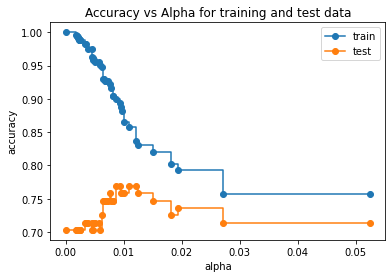

In [22]:
train_scores = [clf_dt.score(X_train,y_train.ravel()) for clf_dt in clf_dts]
test_scores = [clf_dt.score(x_test,y_test.ravel()) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Alpha for training and test data")
ax.plot(ccp_alphas,train_scores,marker = "o",label = "train",drawstyle="steps-post")
ax.plot(ccp_alphas,test_scores,marker = "o",label = "test",drawstyle="steps-post")
ax.legend()
plt.show()

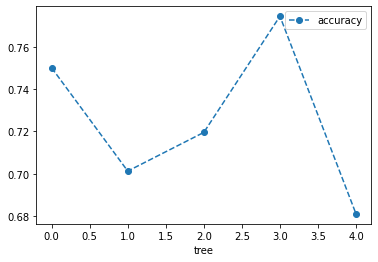

In [23]:
clf_dt = DecisionTreeClassifier(random_state = 42, ccp_alpha = 0.012)

scores = cross_val_score(clf_dt,X_train,y_train.ravel(),cv = 5)
df = pd.DataFrame(data={'tree' : range(5),'accuracy' : scores})

df.plot(x = 'tree', y = 'accuracy', marker ='o',linestyle = '--')

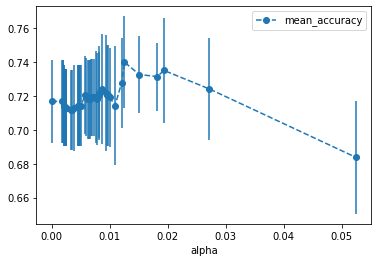

In [25]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0,ccp_alpha = ccp_alpha)
    scores = cross_val_score(clf_dt,X_train,y_train.ravel(),cv=5)
    alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values,columns = ['alpha','mean_accuracy','std'])

alpha_results.plot(x = 'alpha',y = 'mean_accuracy',yerr='std',marker = 'o',linestyle = '--')

In [30]:
alpha_results[(alpha_results['alpha'] > 0.012) & (alpha_results['alpha'] < 0.013)]

,alpha,mean_accuracy,std
38,0.012067,0.727690,0.026617
39,0.012541,0.739885,0.027057


In [33]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.012067) & (alpha_results['alpha'] < 0.013)]['alpha']
ideal_ccp_alpha

39    0.012541
Name: alpha, dtype: float64

In [34]:
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.012541132178624431

In [39]:
clf_dt_pruned = DecisionTreeClassifier(max_depth=1,random_state = 42,ccp_alpha = ideal_ccp_alpha).fit(X_train,y_train.ravel())

In [40]:
metrics(clf_dt_pruned,X_train,y_train.ravel())

              precision    recall  f1-score   support

           0       0.71      0.64      0.67       449
           1       0.61      0.69      0.65       370

    accuracy                           0.66       819
   macro avg       0.66      0.66      0.66       819
weighted avg       0.67      0.66      0.66       819



array([[286, 163],
       [115, 255]])

### 4.2 Hyper Parameter Tuning

### 4.2.1 Randomized Search CV

In [41]:
#randomized search cv

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100,10)]
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(1,15,5)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1,15,5)]
#alpha
ccp = ccp_alphas
# Create the random grid
random_grid = {'ccp_alpha': ccp,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'ccp_alpha': array([0.        , 0.0018315 , 0.002035  , 0.002035  , 0.00209314,
       0.00213675, 0.00231348, 0.00234025, 0.00239316, 0.00239527,
       0.00241734, 0.003256  , 0.0034782 , 0.00379867, 0.00448766,
       0.00459863, 0.00462695, 0.00473798, 0.004884  , 0.00510331,
       0.00569151, 0.00586081, 0.00627943, 0.00651924, 0.00656947,
       0.00684822, 0.00699036, 0.00733478, 0.00771256, 0.00784929,
       0.00808516, 0.00814661, 0.00868135, 0.00943541, 0.00955566,
       0.00966939, 0.0099964 , 0.01091282, 0.01206666, 0.01254113,
       0.01510004, 0.01818807, 0.01934319, 0.02720003, 0.05245657]), 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'min_samples_split': [1, 4, 8, 11, 15], 'min_samples_leaf': [1, 4, 8, 11, 15], 'criterion': ['entropy', 'gini']}


In [42]:
dt = DecisionTreeClassifier()
dt_randomcv = RandomizedSearchCV(estimator=dt,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
dt_randomcv.fit(X_train,y_train.ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    6.5s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [43]:
dt_randomcv.best_params_

{'ccp_alpha': 0.008681346967061257,
 'criterion': 'gini',
 'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 15}

In [44]:
dt_random = DecisionTreeClassifier(ccp_alpha = 0.008681346967061257,criterion= 'gini',max_depth= 60,max_features='sqrt',min_samples_leaf=1,min_samples_split=15).fit(X_train,y_train.ravel())

In [45]:
metrics(dt_random,X_train,y_train.ravel())

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       449
           1       0.69      0.68      0.69       370

    accuracy                           0.72       819
   macro avg       0.72      0.72      0.72       819
weighted avg       0.72      0.72      0.72       819



array([[337, 112],
       [117, 253]])

### 4.2.2 Grid Search CV

In [ ]:
#grid search cv

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100,10)]
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(1,15,5)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1,15,5)]
#alpha
ccp = ccp_alphas
# Create the random grid
param_grid = {'ccp_alpha': ccp,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(param_grid)

{'ccp_alpha': array([0.        , 0.00469484, 0.00528169, 0.0056338 , 0.0056338 ,
       0.00633803, 0.0064554 , 0.00693555, 0.00696401, 0.0084507 ,
       0.00878641, 0.01006036, 0.01077061, 0.01216442, 0.01320423,
       0.01434211, 0.01627543, 0.01738431, 0.01739851, 0.01749278,
       0.01935248, 0.02194764, 0.02717238, 0.03822401, 0.04232763,
       0.0476365 ]), 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'min_samples_split': [1, 4, 8, 11, 15], 'min_samples_leaf': [1, 4, 8, 11, 15], 'criterion': ['entropy', 'gini']}


In [ ]:
dt = DecisionTreeClassifier()
dt_gridcv = GridSearchCV(estimator=dt,param_grid=param_grid,cv=3,verbose=2,n_jobs=-1)
dt_gridcv.fit(X_train,y_train.ravel())

Fitting 3 folds for each of 39000 candidates, totalling 117000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 2152 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done 9928 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 15768 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 22888 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 31320 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 41032 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 52056 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 64360 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 77976 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 92872 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 109080 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 117000 out of 117000 | elapsed: 13.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='de...
       0.01434211, 0.01627543, 0.01738431, 0.01739851, 0.01749278,
       0.01935248, 0.02194764, 

In [ ]:
dt_gridcv.best_params_

{'ccp_alpha': 0.01006036217303823,
 'criterion': 'entropy',
 'max_depth': 70,
 'max_features': 'auto',
 'min_samples_leaf': 8,
 'min_samples_split': 4}

In [ ]:
dt_grid = DecisionTreeClassifier(ccp_alpha = 0.01006036217303823,criterion = 'entropy',max_depth = 70,max_features = 'auto',min_samples_leaf = 8,min_samples_split = 4).fit(X_train,y_train.ravel())

In [ ]:
metrics(dt_grid,X_train,y_train.ravel())

              precision    recall  f1-score   support

           0       0.68      0.65      0.66       159
           1       0.58      0.60      0.59       125

    accuracy                           0.63       284
   macro avg       0.63      0.63      0.63       284
weighted avg       0.63      0.63      0.63       284



array([[104,  55],
       [ 50,  75]])

## 5. Random Forest

In [46]:
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train.ravel())

In [47]:
metrics(rf_classifier,X_train,y_train.ravel())

              precision    recall  f1-score   support

           0       0.77      0.87      0.81       449
           1       0.81      0.68      0.74       370

    accuracy                           0.78       819
   macro avg       0.79      0.77      0.78       819
weighted avg       0.79      0.78      0.78       819



array([[389,  60],
       [118, 252]])

### 5.1 Hyper Parameter Tuning

In [49]:
rf = RandomForestClassifier()
rf_randomcv = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=2,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train.ravel())

Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  9.5min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [50]:
rf_randomcv.best_params_

{'criterion': 'entropy',
 'max_depth': 77,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 911}

In [51]:
rf = RandomForestClassifier(n_estimators=911,min_samples_split=2,min_samples_leaf=1,max_features='auto',max_depth=100,criterion='entropy').fit(X_train,y_train.ravel())

In [56]:
#validation accuracy
pred = rf.predict(x_test)
score = accuracy_score(y_test,pred)
print(score)

0.8351648351648352


In [52]:
metrics(rf,X_train,y_train.ravel())

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       449
           1       0.84      0.78      0.81       370

    accuracy                           0.83       819
   macro avg       0.83      0.83      0.83       819
weighted avg       0.83      0.83      0.83       819



array([[393,  56],
       [ 81, 289]])

## 6. XGBoost

In [53]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic',seed=42)
clf_xgb.fit(X_train,y_train.ravel(),verbose = True,early_stopping_rounds = 10,eval_metric = 'aucpr',eval_set = [(x_test,y_test.ravel())])

[0]	validation_0-aucpr:0.648652
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.743332
[2]	validation_0-aucpr:0.759825
[3]	validation_0-aucpr:0.772913
[4]	validation_0-aucpr:0.79433
[5]	validation_0-aucpr:0.826058
[6]	validation_0-aucpr:0.817041
[7]	validation_0-aucpr:0.814544
[8]	validation_0-aucpr:0.819428
[9]	validation_0-aucpr:0.818282
[10]	validation_0-aucpr:0.818612
[11]	validation_0-aucpr:0.823403
[12]	validation_0-aucpr:0.827769
[13]	validation_0-aucpr:0.836917
[14]	validation_0-aucpr:0.846135
[15]	validation_0-aucpr:0.84272
[16]	validation_0-aucpr:0.836655
[17]	validation_0-aucpr:0.828278
[18]	validation_0-aucpr:0.827993
[19]	validation_0-aucpr:0.828318
[20]	validation_0-aucpr:0.835068
[21]	validation_0-aucpr:0.834304
[22]	validation_0-aucpr:0.838907
[23]	validation_0-aucpr:0.839524
[24]	validation_0-aucpr:0.833889
Stopping. Best iteration:
[14]	validation_0-aucpr:0.846135



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

In [54]:
#validation accuracy
pred = clf_xgb.predict(x_test)
score = accuracy_score(y_test,pred)
print(score)

0.7912087912087912


In [55]:
metrics(clf_xgb,X_train,y_train.ravel())

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       449
           1       0.84      0.80      0.82       370

    accuracy                           0.84       819
   macro avg       0.84      0.84      0.84       819
weighted avg       0.84      0.84      0.84       819



array([[393,  56],
       [ 75, 295]])

### 6.1 Hyper Parameter Optimization

In [57]:
param_grid = {
    'max_depth' : [3,4,5],
    'learning_rate' : [0.1,0.01,0.05],
    'gamma' : [0,0.25,1.0],  
    'reg_lamda' : [0,1.0,10.0],  
    'scale_pos_weight' : [1,3,5]
}
param_grid

{'gamma': [0, 0.25, 1.0],
 'learning_rate': [0.1, 0.01, 0.05],
 'max_depth': [3, 4, 5],
 'reg_lamda': [0, 1.0, 10.0],
 'scale_pos_weight': [1, 3, 5]}

In [ ]:
xg = XGBClassifier(objective = 'binary:logistic',subsample = 0.9,colsample_bytree = 0.5)
xgb_randomcv = RandomizedSearchCV(estimator=xg,param_distributions=param_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

xgb_randomcv.fit(X_train,y_train.ravel())

In [ ]:
xgb_randomcv.best_params_

{'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 5,
 'reg_lamda': 10.0,
 'scale_pos_weight': 5}

In [ ]:
xgb_best = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=10.0, scale_pos_weight=5, seed=42,
              silent=None, subsample=1, verbosity=1)

In [ ]:
metrics(xgb_best,X_train,y_train.ravel())

              precision    recall  f1-score   support

           0       0.79      0.62      0.69       159
           1       0.62      0.79      0.69       125

    accuracy                           0.69       284
   macro avg       0.70      0.70      0.69       284
weighted avg       0.71      0.69      0.69       284



array([[98, 61],
       [26, 99]])

## 7. ANN

In [ ]:
X_train.shape

(819, 9408)

In [ ]:
ann = Sequential()
ann.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=9408))
ann.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))
ann.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [ ]:
ann.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model = ann.fit(X_train,y_train.ravel(),validation_data=(x_test,y_test.ravel()),batch_size=10,epochs=100)

Epoch 1/100
82/82 [==============================] - 1s 6ms/step - loss: 1.1185 - accuracy: 0.5311 - val_loss: 0.8348 - val_accuracy: 0.6374
Epoch 2/100
82/82 [==============================] - 0s 3ms/step - loss: 0.7000 - accuracy: 0.5923 - val_loss: 1.1443 - val_accuracy: 0.5934
Epoch 3/100
82/82 [==============================] - 0s 3ms/step - loss: 0.6264 - accuracy: 0.6138 - val_loss: 0.7177 - val_accuracy: 0.6813
Epoch 4/100
82/82 [==============================] - 0s 3ms/step - loss: 0.4694 - accuracy: 0.7791 - val_loss: 0.6923 - val_accuracy: 0.6923
Epoch 5/100
82/82 [==============================] - 0s 3ms/step - loss: 0.4302 - accuracy: 0.8142 - val_loss: 0.6551 - val_accuracy: 0.7033
Epoch 6/100
82/82 [==============================] - 0s 3ms/step - loss: 0.4276 - accuracy: 0.8026 - val_loss: 0.8655 - val_accuracy: 0.7143
Epoch 7/100
82/82 [==============================] - 0s 3ms/step - loss: 0.4092 - accuracy: 0.7885 - val_loss: 0.7981 - val_accuracy: 0.7143
Epoch 8/100
8

In [ ]:
print(model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


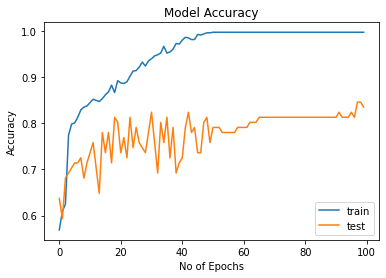

In [ ]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc ='lower right')
plt.show()

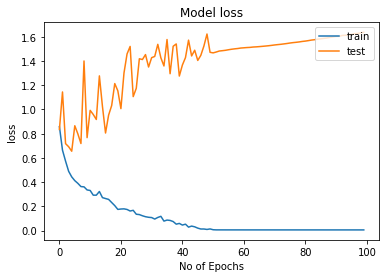

In [ ]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model loss')
plt.xlabel('No of Epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc ='upper right')
plt.show()

In [ ]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
score = accuracy_score(y_test,y_pred)
print(cm)
print(score)

[[39 10]
 [ 5 37]]
0.8351648351648352


## Saving Best Model

In [ ]:
joblib.dump(log, 'log_dino.pkl')

['log_dino.pkl']